In [2]:
import os
import glob
import pandas as pd
import datetime
import matplotlib.pyplot as plt

cameras = [
    ["CAM02009CCTV7.jpg", 
     "I-80 Eastbound Exit 161 Bellefonte Interchange (I-80 & I-99)","no change",40.944571,-77.720918],
    ["CAM02001CCTV2.jpg", 
     "Port Matilda US-322 By-Pass Westbound","changed 4/27",40.810961,-78.075259],
    ["CAM02010CCTV11.jpg", 
     "Port Matilda I-99 Exit 61 Median","no change",40.803880,-78.063664],
    ["CAM02005CCTV9.jpg", 
     "Milesburg Interchange West I-80 Exit 158 Eastbound / Alt US-220","no change",40.955477,-77.773749],
    ["CAM02006CCTV10.jpg", 
     "Milesburg Interchange East I-80 Exit 158 Westbound / PA-150","changed 4/27",40.956061,-77.766277],
    ["CAM02028CCTV32.jpg",
     "Atherton and Valley Vista","no change",40.812073,-77.922500],
    ["CAM02037CCTV43.jpg",
     "Atherton and Vairo","no change",40.807936,-77.895204],
    ["CAM02038CCTV44.jpg",
     "Atherton and North Hills","no change",40.805031,-77.886886],
    ["CAM02039CCTV45.jpg",
     "Atherton and Park","no change",40.796522,-77.872549],
    ["CAM02040CCTV46.jpg",
     "Atherton and W.College","changed 5/2",40.791787,-77.864971],
    ["CAM02042CCTV49.jpg",
     "Atherton and W.Beaver","changed 5/2-5/4, then returned",40.790894,-77.863812],
    ["CAM02003CCTV4.jpg",
     "I-99/US-322 Interchange","changed 5/1",40.828613,-77.840339],
    ["CAM02020CCTV24.jpg",
     "Benner Pike","changed 5/6-5/7, then returned",40.829048,-77.804817],
    ["CAM02002CCTV3.jpg",
     "Grays Woods","changed 5/3",40.817144,-77.939841],
    ["CAM02007CCTV13.jpg",
     "US-322 E/O PA-26","changed 5/4",40.795773,-77.820937],
    ["CAM02046CCTV52.jpg",
     "I-99 at Exit 71 (Toftrees)","changed 5/5",40.817953,-77.900271],
    ["CAM02033CCTV38.jpg",
     "Snowshoe I-80 Exit 147","no change",41.022703,-77.933981],
    ["collegeTwp.jpg",
     "College Township Traffic camera","no change",40.811564,-77.830719],
    ["parkArboretum.jpg",
     "PSU Park Ave.","no change",40.804483,-77.864219]
    ]

camdfs = pd.DataFrame(cameras,columns = ['ID','Description','status','Latitude','Longitude'])
camdfs[['ID','Description','status']]

,ID,Description,status
0,CAM02009CCTV7.jpg,I-80 Eastbound Exit 161 Bellefonte Interchange...,no change
1,CAM02001CCTV2.jpg,Port Matilda US-322 By-Pass Westbound,changed 4/27
2,CAM02010CCTV11.jpg,Port Matilda I-99 Exit 61 Median,no change
3,CAM02005CCTV9.jpg,Milesburg Interchange West I-80 Exit 158 Eastb...,no change
4,CAM02006CCTV10.jpg,Milesburg Interchange East I-80 Exit 158 Westb...,changed 4/27
5,CAM02028CCTV32.jpg,Atherton and Valley Vista,no change
6,CAM02037CCTV43.jpg,Atherton and Vairo,no change
7,CAM02038CCTV44.jpg,Atherton and North Hills,no change
8,CAM02039CCTV45.jpg,Atherton and Park,no change
9,CAM02040CCTV46.jpg,Atherton and W.College,changed 5/2


In [206]:
# Loading all camera data...
xdf0 = pd.read_csv("/home/ubuntu/nitelite/ped810-105.csv")

#dfcam['time'] =  pd.to_datetime(dfcam['time'])
#dfcam = dfcam.sort_values(by='time')

#dfcam = dfcam.rename(columns={"time": "datetime_UTC", "file": "image_file", "vehicle": "vehicle_count"})
xdf0['datetime_EST'] = pd.to_datetime(xdf0['datetime_UTC']) - pd.Timedelta(hours=4)

xdf0['datetime_EST'] = pd.to_datetime(xdf0['datetime_EST'])
xdf0.sort_values(by='datetime_EST')

,datetime_UTC,image_path,camera_name,pedestrian_count,datetime_EST
779,2020-08-10 17:18:30,'/home/ubuntu/cams20/collegeTwp/20200810/20200...,collegeTwp.jpg,0,2020-08-10 13:18:30
414,2020-08-10 17:18:34,'/home/ubuntu/cams20/CAM02028CCTV32/20200810/2...,CAM02028CCTV32.jpg,0,2020-08-10 13:18:34
513,2020-08-10 17:18:36,'/home/ubuntu/cams20/CAM02037CCTV43/20200810/2...,CAM02037CCTV43.jpg,0,2020-08-10 13:18:36
564,2020-08-10 17:18:38,'/home/ubuntu/cams20/CAM02038CCTV44/20200810/2...,CAM02038CCTV44.jpg,0,2020-08-10 13:18:38
610,2020-08-10 17:18:40,'/home/ubuntu/cams20/CAM02039CCTV45/20200810/2...,CAM02039CCTV45.jpg,0,2020-08-10 13:18:40
...,...,...,...,...,...
1912449,2020-10-05 15:04:24,'/home/ubuntu/cams30/CAM02005CCTV9/20201005/20...,CAM02005CCTV9.jpg,0,2020-10-05 11:04:24
1912455,2020-10-05 15:04:26,'/home/ubuntu/cams30/CAM02006CCTV10/20201005/2...,CAM02006CCTV10.jpg,0,2020-10-05 11:04:26
1912495,2020-10-05 15:04:28,'/home/ubuntu/cams30/CAM02033CCTV38/20201005/2...,CAM02033CCTV38.jpg,0,2020-10-05 11:04:28
1912533,2020-10-05 15:04:30,'/home/ubuntu/cams30/collegeTwp/20201005/20201...,collegeTwp.jpg,0,2020-10-05 11:04:30


In [207]:
# Loading all camera data...
xdf7 = pd.read_csv("/home/ubuntu/nitelite/full_pedestrians_427-810.csv")

#dfcam['time'] =  pd.to_datetime(dfcam['time'])
#dfcam = dfcam.sort_values(by='time')

#dfcam = dfcam.rename(columns={"time": "datetime_UTC", "file": "image_file", "vehicle": "vehicle_count"})
xdf7['datetime_EST'] = pd.to_datetime(xdf7['datetime_UTC']) - pd.Timedelta(hours=4)

xdf7['datetime_EST'] = pd.to_datetime(xdf7['datetime_EST'])
xdf7.sort_values(by='datetime_EST')

,datetime_UTC,image_path,camera_name,pedestrian_count,datetime_EST
2402880,2020-04-24 20:41:29,/home/ubuntu/cams1/20200424_204129_collegeTwp....,collegeTwp,0,2020-04-24 16:41:29
2401583,2020-04-24 20:41:32,/home/ubuntu/cams1/20200424_204132_CAM02028CCT...,CAM02028CCTV32,0,2020-04-24 16:41:32
2401889,2020-04-24 20:41:34,/home/ubuntu/cams1/20200424_204134_CAM02037CCT...,CAM02037CCTV43,0,2020-04-24 16:41:34
2402078,2020-04-24 20:41:36,/home/ubuntu/cams1/20200424_204136_CAM02038CCT...,CAM02038CCTV44,0,2020-04-24 16:41:36
2402236,2020-04-24 20:41:38,/home/ubuntu/cams1/20200424_204138_CAM02039CCT...,CAM02039CCTV45,0,2020-04-24 16:41:38
...,...,...,...,...,...
224598,2020-08-10 17:18:14,'/home/ubuntu/cams19/CAM02039CCTV45/20200810/2...,CAM02039CCTV45.jpg,0,2020-08-10 13:18:14
224615,2020-08-10 17:18:16,'/home/ubuntu/cams19/CAM02040CCTV46/20200810/2...,CAM02040CCTV46.jpg,0,2020-08-10 13:18:16
224634,2020-08-10 17:18:18,'/home/ubuntu/cams19/CAM02042CCTV49/20200810/2...,CAM02042CCTV49.jpg,0,2020-08-10 13:18:18
224357,2020-08-10 17:18:20,'/home/ubuntu/cams19/CAM02003CCTV4/20200810/20...,CAM02003CCTV4.jpg,0,2020-08-10 13:18:20


In [208]:
xdf = pd.concat([xdf0,xdf7])

In [209]:
xdf.sort_values(by='datetime_EST')

,datetime_UTC,image_path,camera_name,pedestrian_count,datetime_EST
2402880,2020-04-24 20:41:29,/home/ubuntu/cams1/20200424_204129_collegeTwp....,collegeTwp,0,2020-04-24 16:41:29
2401583,2020-04-24 20:41:32,/home/ubuntu/cams1/20200424_204132_CAM02028CCT...,CAM02028CCTV32,0,2020-04-24 16:41:32
2401889,2020-04-24 20:41:34,/home/ubuntu/cams1/20200424_204134_CAM02037CCT...,CAM02037CCTV43,0,2020-04-24 16:41:34
2402078,2020-04-24 20:41:36,/home/ubuntu/cams1/20200424_204136_CAM02038CCT...,CAM02038CCTV44,0,2020-04-24 16:41:36
2402236,2020-04-24 20:41:38,/home/ubuntu/cams1/20200424_204138_CAM02039CCT...,CAM02039CCTV45,0,2020-04-24 16:41:38
...,...,...,...,...,...
1912449,2020-10-05 15:04:24,'/home/ubuntu/cams30/CAM02005CCTV9/20201005/20...,CAM02005CCTV9.jpg,0,2020-10-05 11:04:24
1912455,2020-10-05 15:04:26,'/home/ubuntu/cams30/CAM02006CCTV10/20201005/2...,CAM02006CCTV10.jpg,0,2020-10-05 11:04:26
1912495,2020-10-05 15:04:28,'/home/ubuntu/cams30/CAM02033CCTV38/20201005/2...,CAM02033CCTV38.jpg,0,2020-10-05 11:04:28
1912533,2020-10-05 15:04:30,'/home/ubuntu/cams30/collegeTwp/20201005/20201...,collegeTwp.jpg,0,2020-10-05 11:04:30


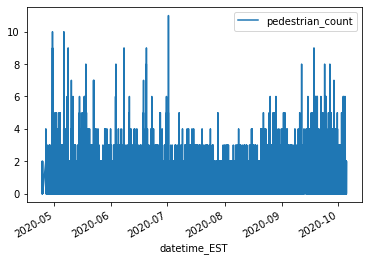

In [132]:
xdf.plot(x="datetime_EST",y='pedestrian_count')

In [210]:
xdf.to_csv(f"full_pedestrians_427-105.csv",index=False)

In [211]:

bennerpikeimages = xdf[ xdf['camera_name'] == 'CAM02020CCTV24.jpg' ].index 
  
# drop these row indexes 
# from dataFrame 

#xdf = xdf.drop(bennerpikeimages, inplace = True) 
xdfb = xdf.drop(xdf[ xdf['camera_name'] == 'CAM02020CCTV24.jpg' ].index ) 

In [183]:
xdf

,datetime_UTC,image_path,camera_name,pedestrian_count,datetime_EST
0,2020-08-10 17:19:41,'/home/ubuntu/cams20/CAM02001CCTV2/20200810/20...,CAM02001CCTV2.jpg,0,2020-08-10 13:19:41
1,2020-08-10 17:22:40,'/home/ubuntu/cams20/CAM02001CCTV2/20200810/20...,CAM02001CCTV2.jpg,0,2020-08-10 13:22:40
2,2020-08-10 17:23:21,'/home/ubuntu/cams20/CAM02001CCTV2/20200810/20...,CAM02001CCTV2.jpg,0,2020-08-10 13:23:21
3,2020-08-10 17:24:02,'/home/ubuntu/cams20/CAM02001CCTV2/20200810/20...,CAM02001CCTV2.jpg,0,2020-08-10 13:24:02
4,2020-08-10 17:24:50,'/home/ubuntu/cams20/CAM02001CCTV2/20200810/20...,CAM02001CCTV2.jpg,0,2020-08-10 13:24:50
...,...,...,...,...,...
3718960,2020-06-15 14:00:31,'/home/ubuntu/camsb9/parkArboretum/20200615/20...,parkArboretum.jpg,0,2020-06-15 10:00:31
3718961,2020-06-15 14:01:11,'/home/ubuntu/camsb9/parkArboretum/20200615/20...,parkArboretum.jpg,0,2020-06-15 10:01:11
3718962,2020-06-15 14:01:52,'/home/ubuntu/camsb9/parkArboretum/20200615/20...,parkArboretum.jpg,0,2020-06-15 10:01:52
3718963,2020-06-15 14:03:37,'/home/ubuntu/camsb9/parkArboretum/20200615/20...,parkArboretum.jpg,0,2020-06-15 10:03:37


In [184]:
xdfb

,datetime_UTC,image_path,camera_name,pedestrian_count,datetime_EST
0,2020-08-10 17:19:41,'/home/ubuntu/cams20/CAM02001CCTV2/20200810/20...,CAM02001CCTV2.jpg,0,2020-08-10 13:19:41
1,2020-08-10 17:22:40,'/home/ubuntu/cams20/CAM02001CCTV2/20200810/20...,CAM02001CCTV2.jpg,0,2020-08-10 13:22:40
2,2020-08-10 17:23:21,'/home/ubuntu/cams20/CAM02001CCTV2/20200810/20...,CAM02001CCTV2.jpg,0,2020-08-10 13:23:21
3,2020-08-10 17:24:02,'/home/ubuntu/cams20/CAM02001CCTV2/20200810/20...,CAM02001CCTV2.jpg,0,2020-08-10 13:24:02
4,2020-08-10 17:24:50,'/home/ubuntu/cams20/CAM02001CCTV2/20200810/20...,CAM02001CCTV2.jpg,0,2020-08-10 13:24:50
...,...,...,...,...,...
3718960,2020-06-15 14:00:31,'/home/ubuntu/camsb9/parkArboretum/20200615/20...,parkArboretum.jpg,0,2020-06-15 10:00:31
3718961,2020-06-15 14:01:11,'/home/ubuntu/camsb9/parkArboretum/20200615/20...,parkArboretum.jpg,0,2020-06-15 10:01:11
3718962,2020-06-15 14:01:52,'/home/ubuntu/camsb9/parkArboretum/20200615/20...,parkArboretum.jpg,0,2020-06-15 10:01:52
3718963,2020-06-15 14:03:37,'/home/ubuntu/camsb9/parkArboretum/20200615/20...,parkArboretum.jpg,0,2020-06-15 10:03:37


In [212]:
icdf = xdfb.groupby([pd.Grouper(key='datetime_EST',freq='H'),xdfb.camera_name]).size().reset_index(name='image_count')

In [213]:
icdfs = icdf.groupby(['datetime_EST'])['image_count'].sum().reset_index(name='image_count_sum')

In [214]:
icdfcvc = xdfb.groupby([pd.Grouper(key='datetime_EST',freq='H'),xdfb.camera_name])['pedestrian_count'].sum().reset_index(name='pedestrian_count_sum')

In [215]:
icdfcvc

,datetime_EST,camera_name,pedestrian_count_sum
0,2020-04-24 16:00:00,CAM02001CCTV2,0
1,2020-04-24 16:00:00,CAM02002CCTV3,0
2,2020-04-24 16:00:00,CAM02003CCTV4,0
3,2020-04-24 16:00:00,CAM02005CCTV9,0
4,2020-04-24 16:00:00,CAM02006CCTV10,0
...,...,...,...
69658,2020-10-05 11:00:00,CAM02040CCTV46.jpg,1
69659,2020-10-05 11:00:00,CAM02042CCTV49.jpg,0
69660,2020-10-05 11:00:00,CAM02046CCTV52.jpg,0
69661,2020-10-05 11:00:00,collegeTwp.jpg,0


In [216]:
icdfcvc['image_count'] = icdf["image_count"]

In [217]:
def get_vcc_avg(row):
    rv = 0.0
    if row.image_count > 0:
        rv = (float(row.pedestrian_count_sum) / (float(row.image_count)/60.0))
    return(rv)   

In [218]:
icdfcvc['pedestrian_avg'] = icdfcvc.apply(get_vcc_avg, axis=1)

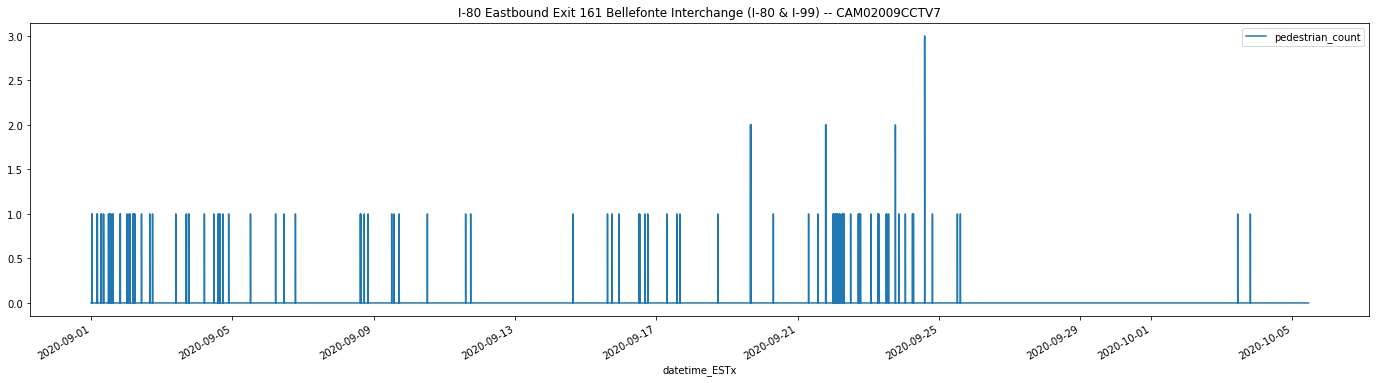

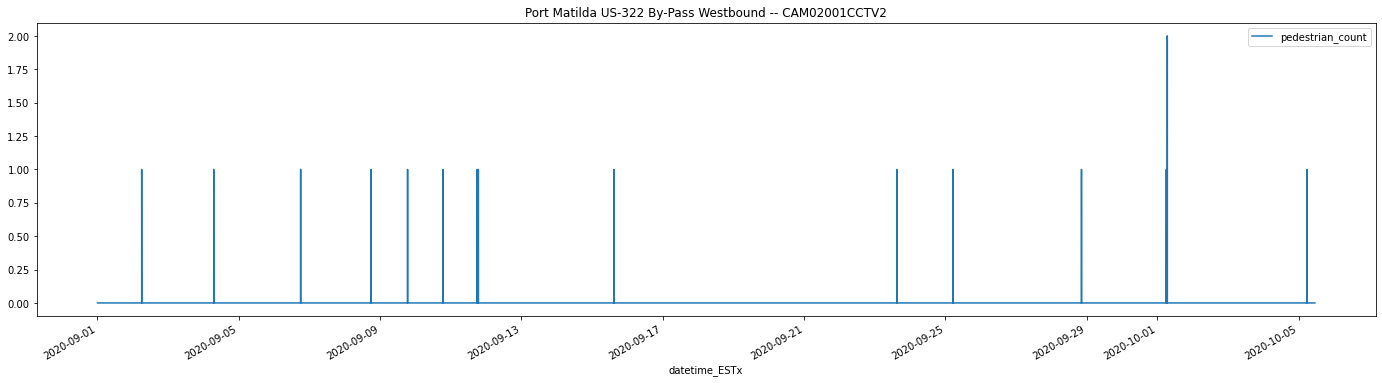

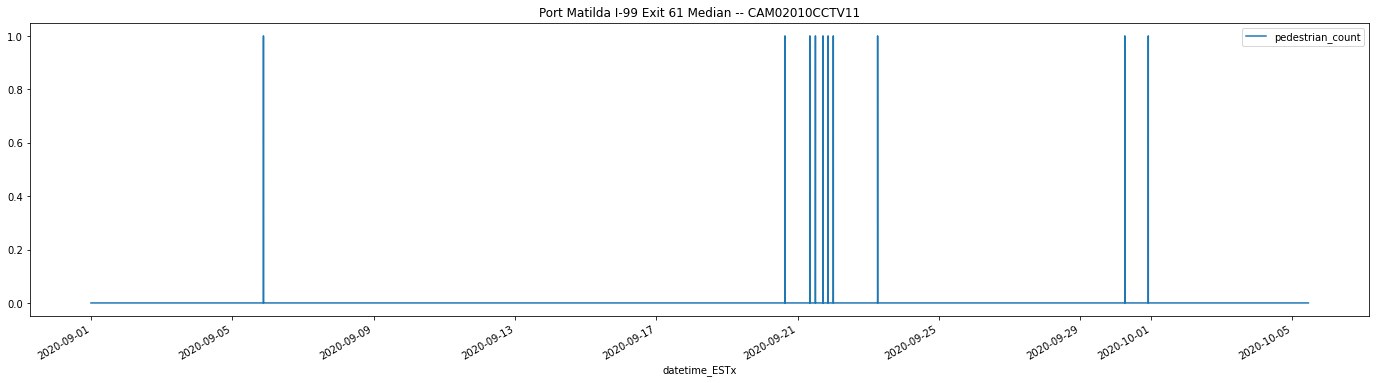

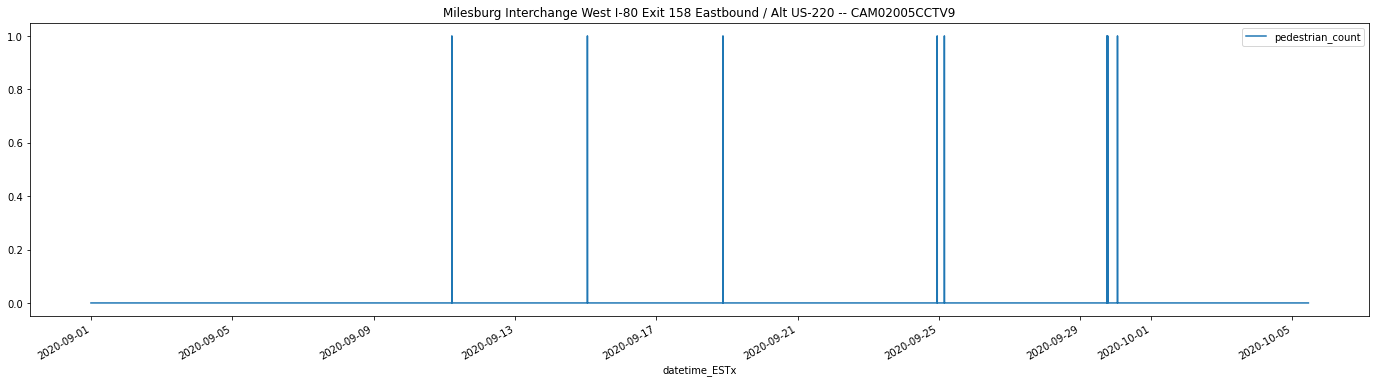

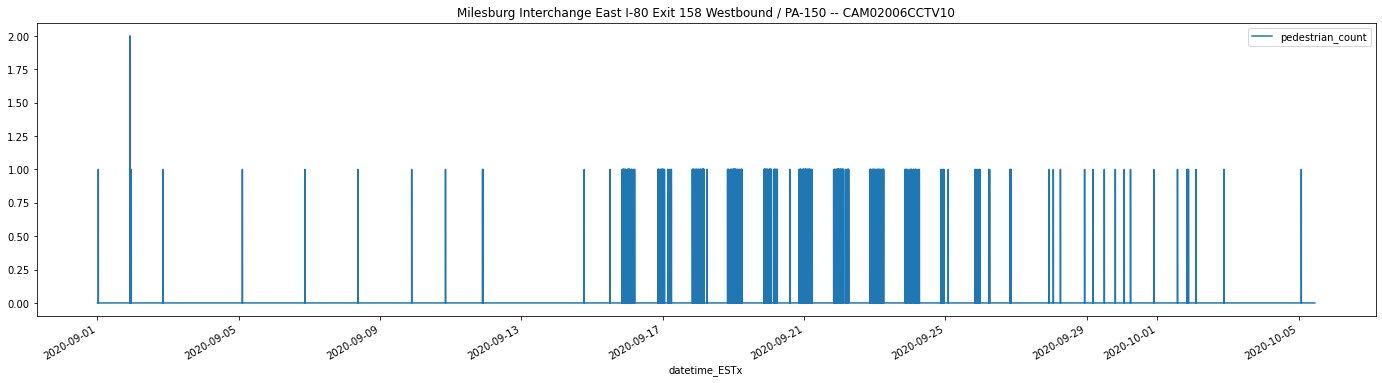

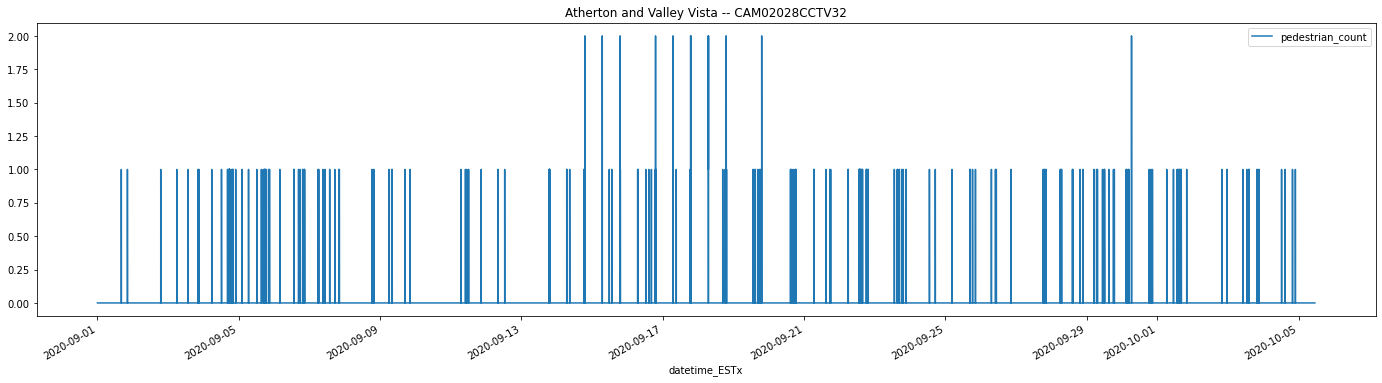

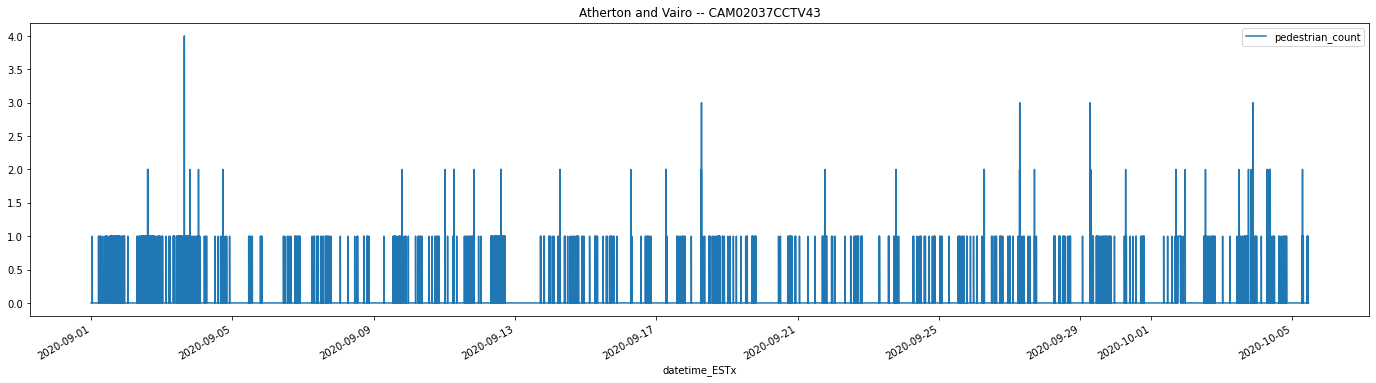

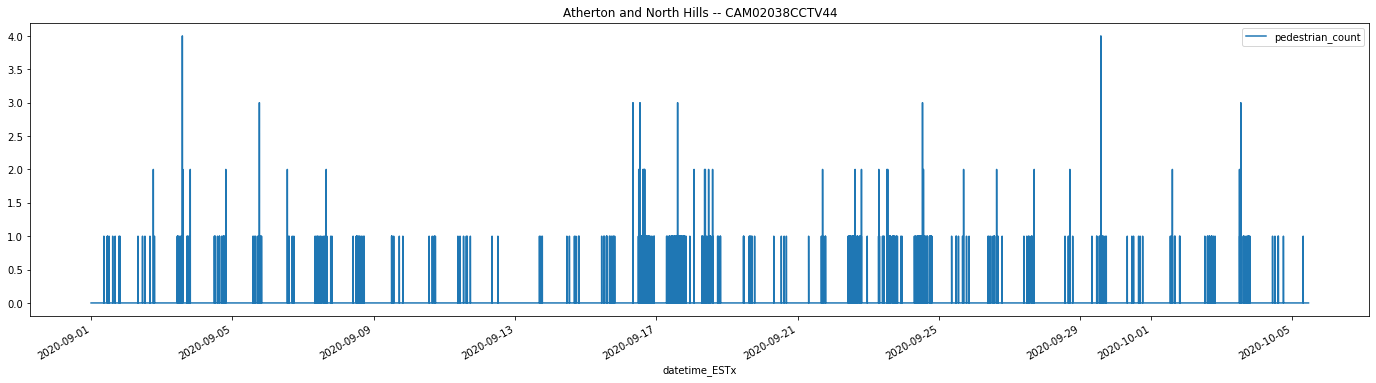

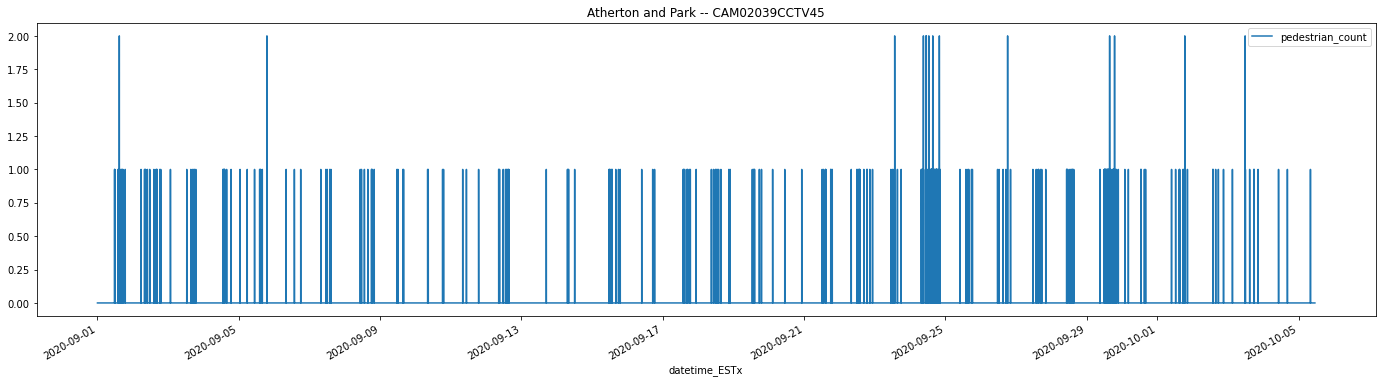

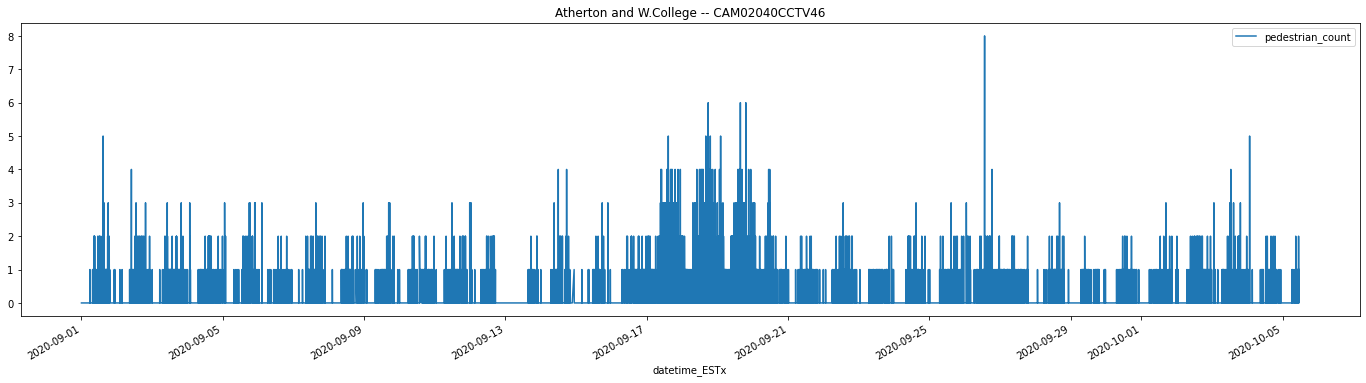

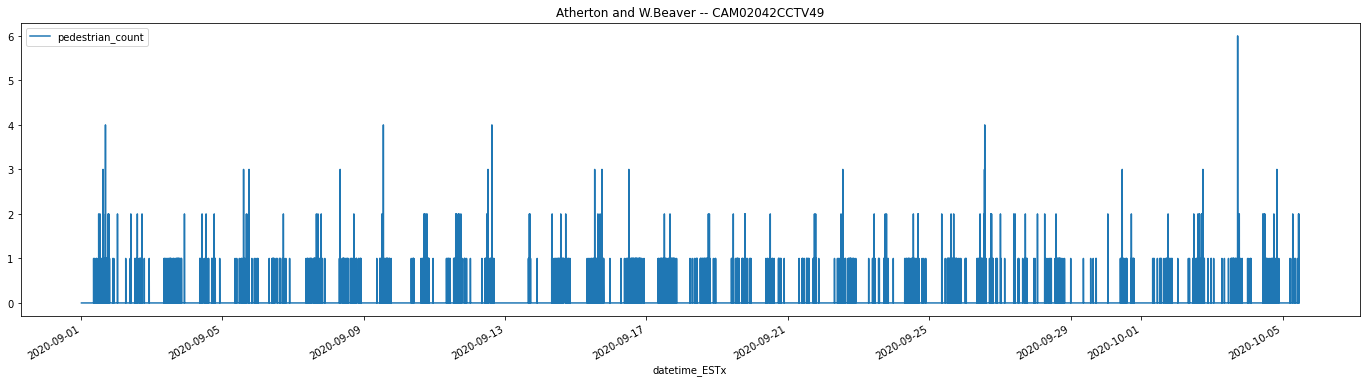

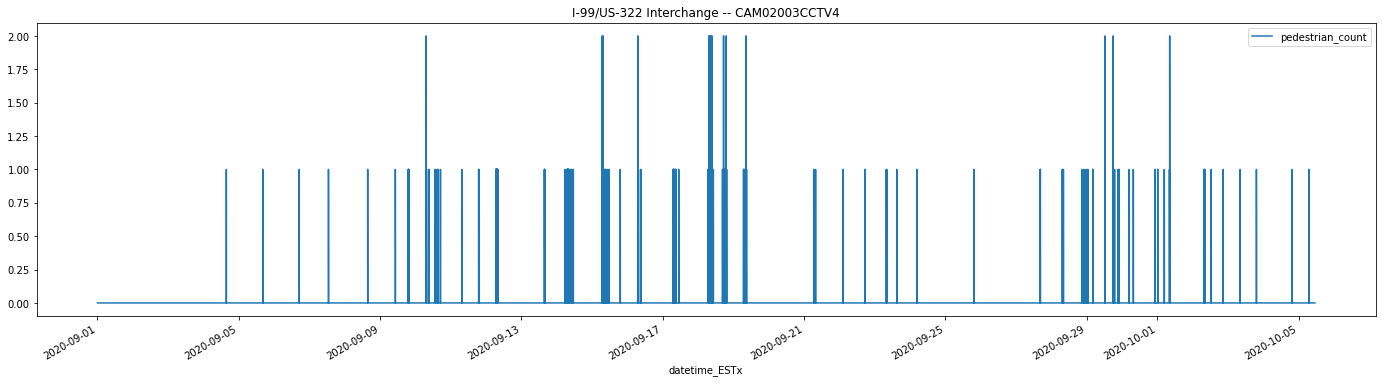

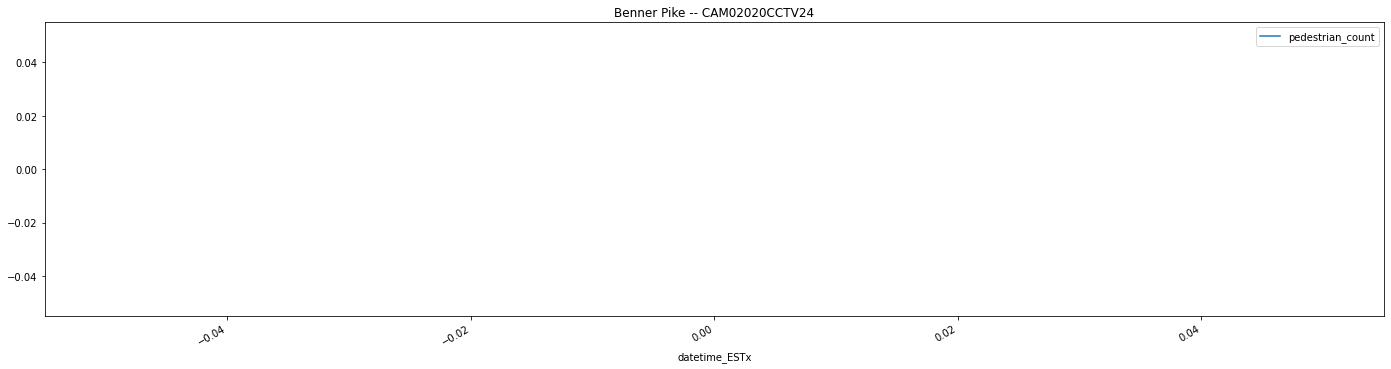

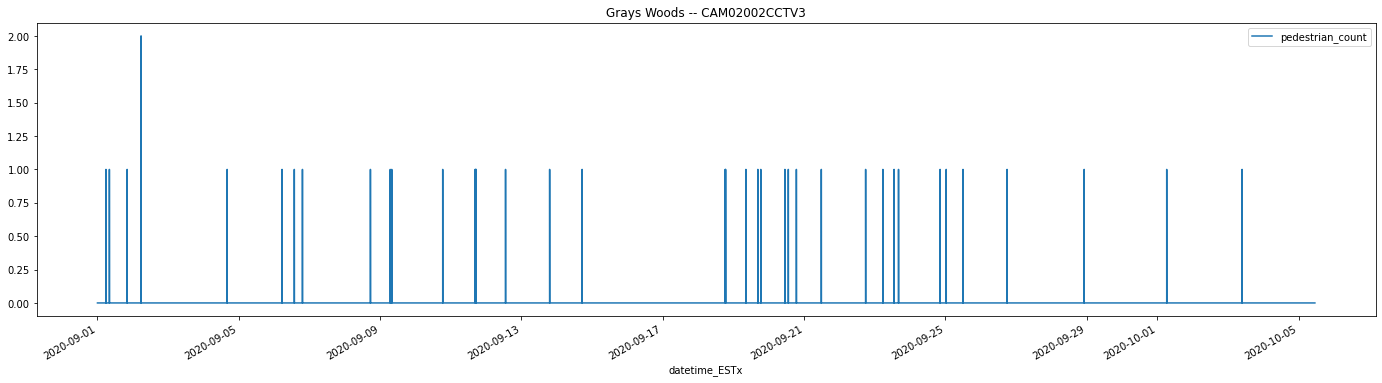

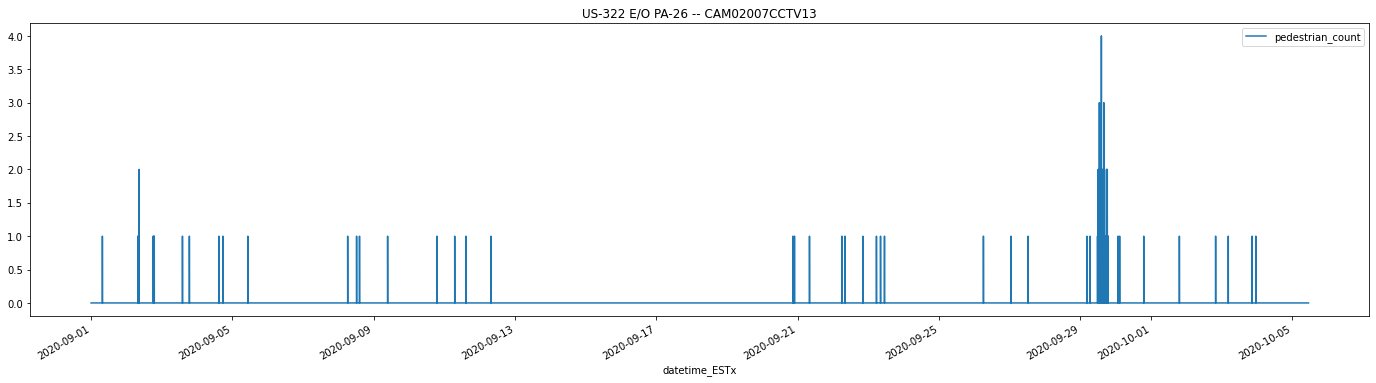

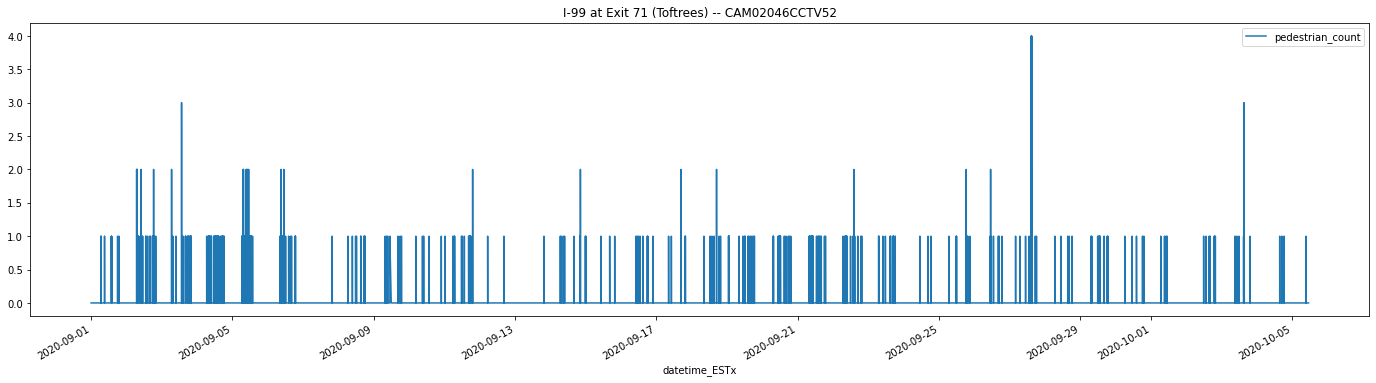

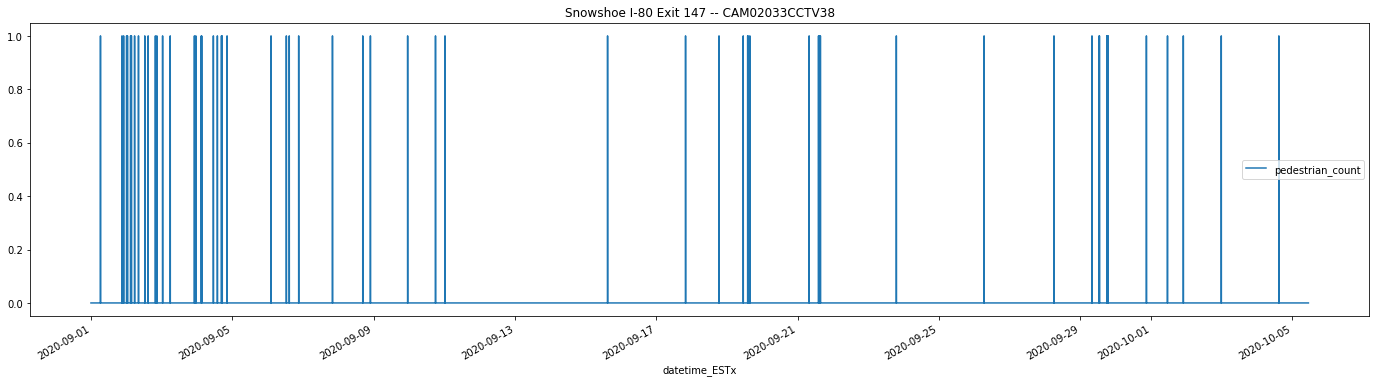

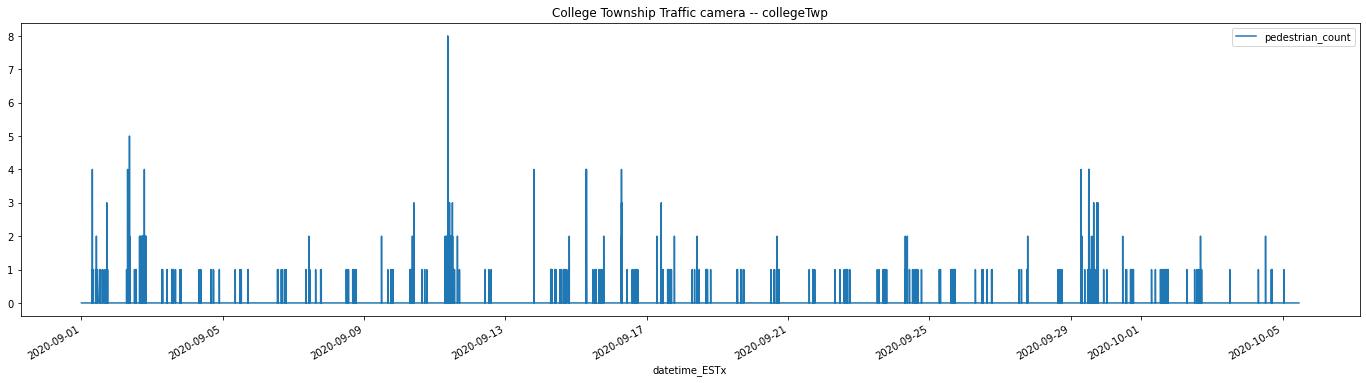

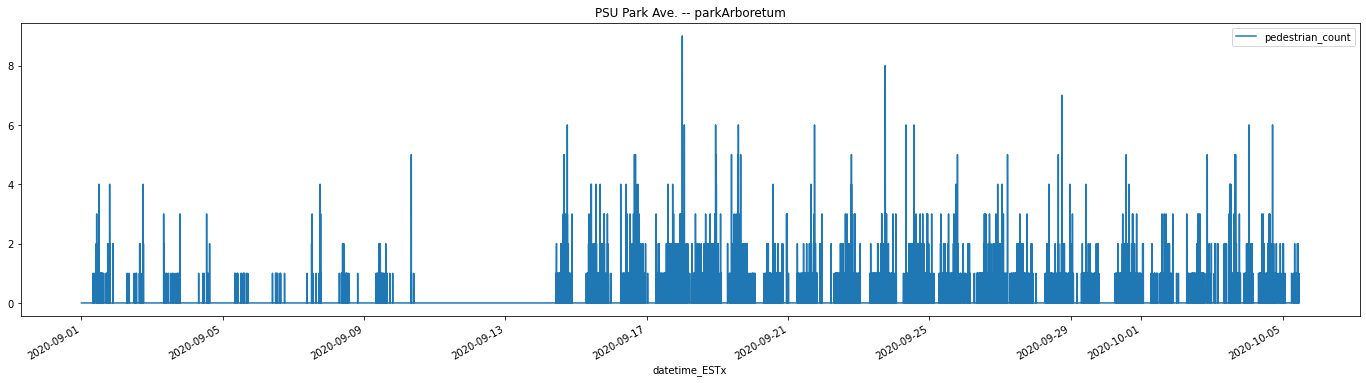

In [220]:
for c in cameras:
    cn = c[0][:-4]
    fdf_twp = xdfb[xdfb['camera_name'].str.contains(cn)].copy()
    
    fdf_twp['datetime_ESTx'] = pd.to_datetime(fdf_twp['datetime_EST'])
    fdf_twp.sort_values(by='datetime_ESTx')
    fromjul = fdf_twp[fdf_twp['datetime_ESTx'] > '2020-9-1 00:00:00']
    ax = fromjul.plot(x ='datetime_ESTx', y='pedestrian_count', kind = 'line',figsize=(24,6),title=f"{c[1]} -- {cn}")

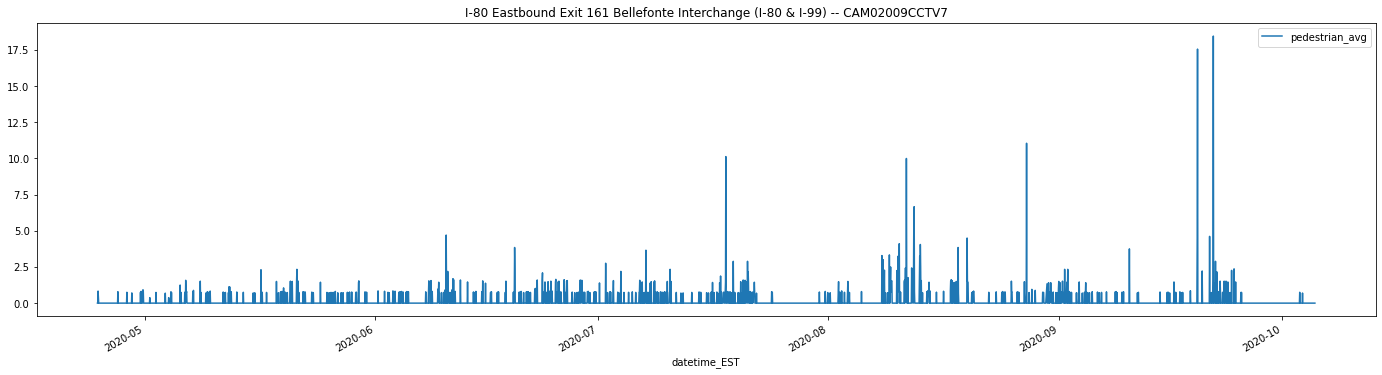

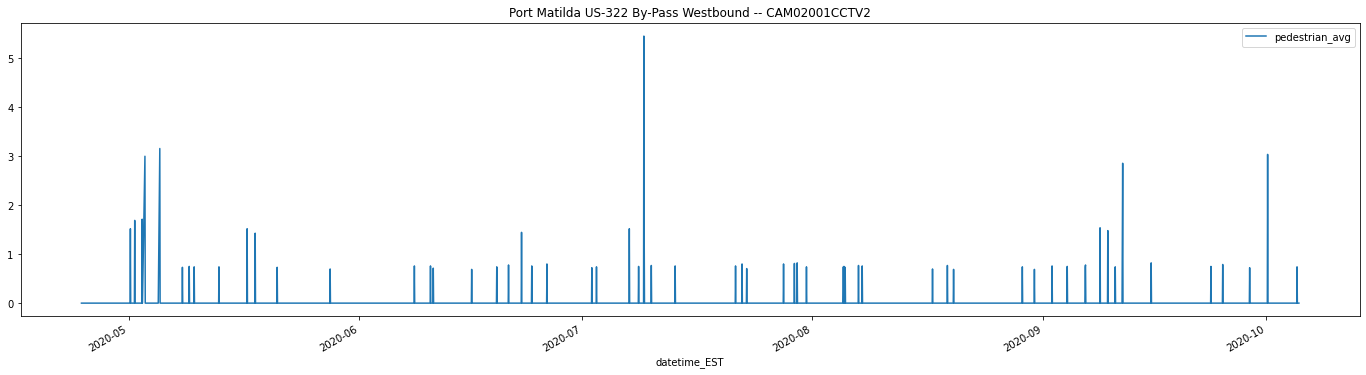

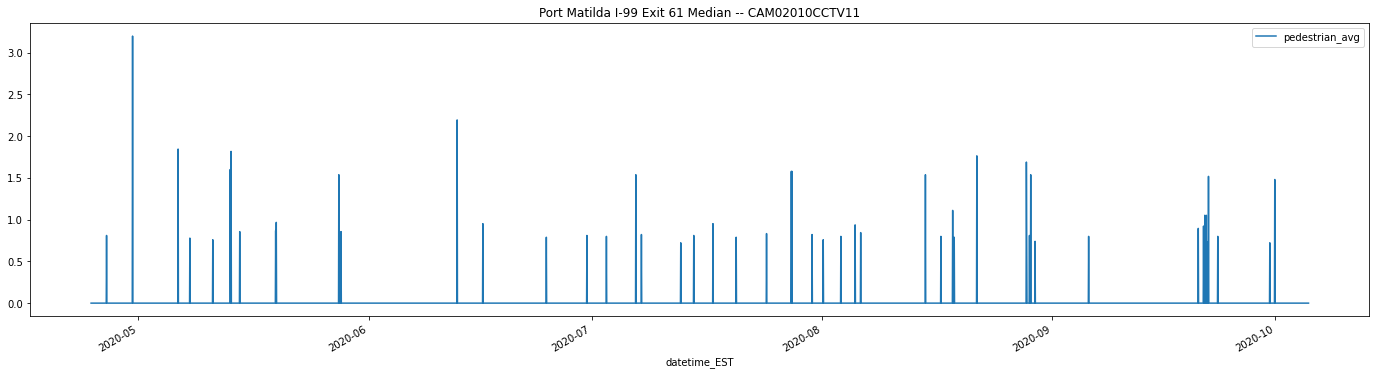

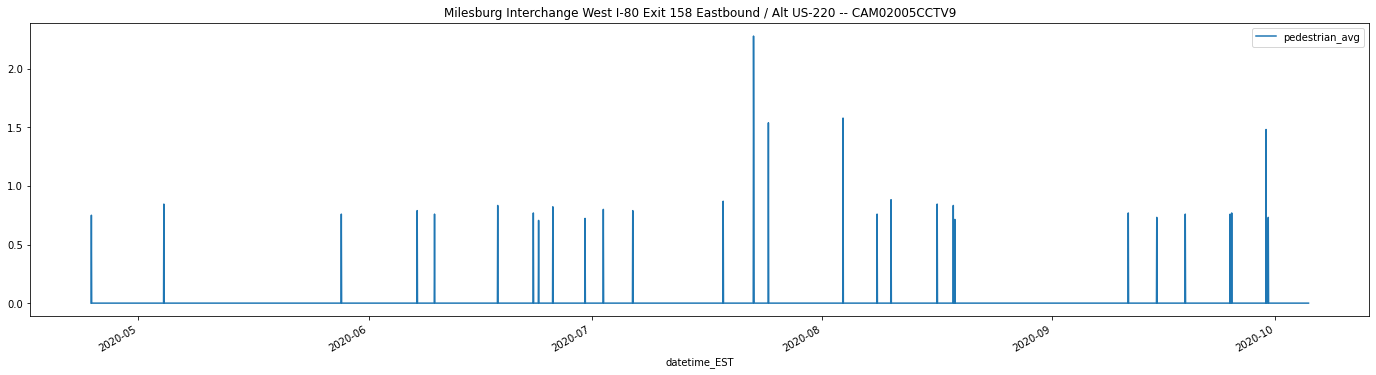

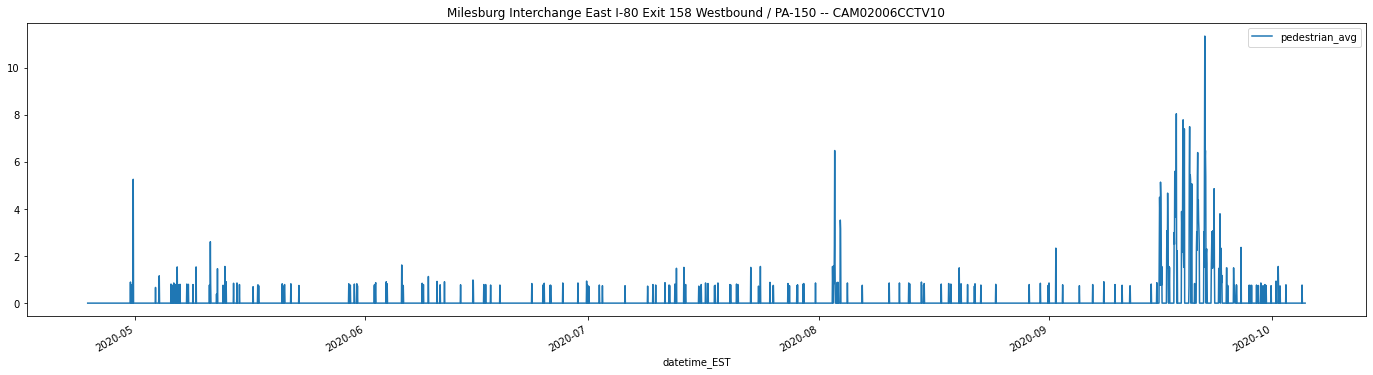

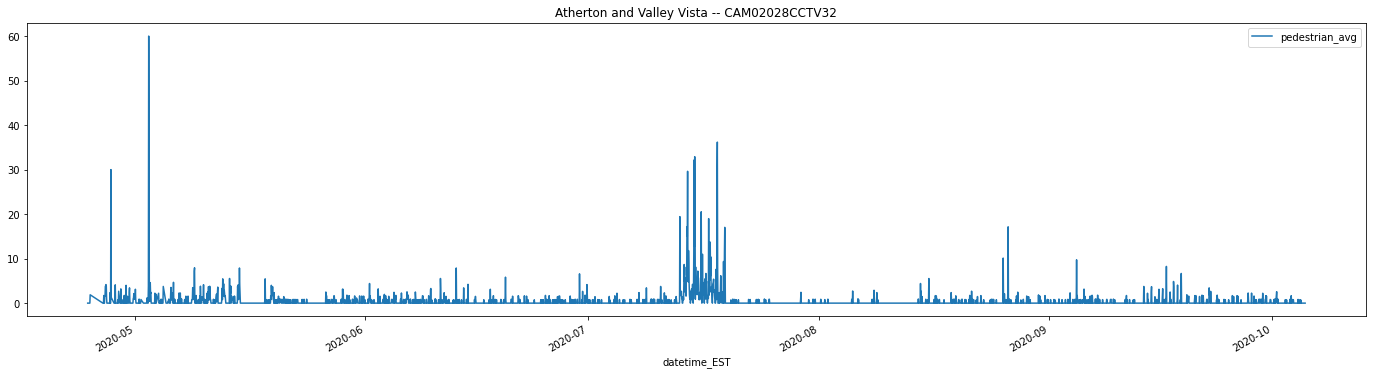

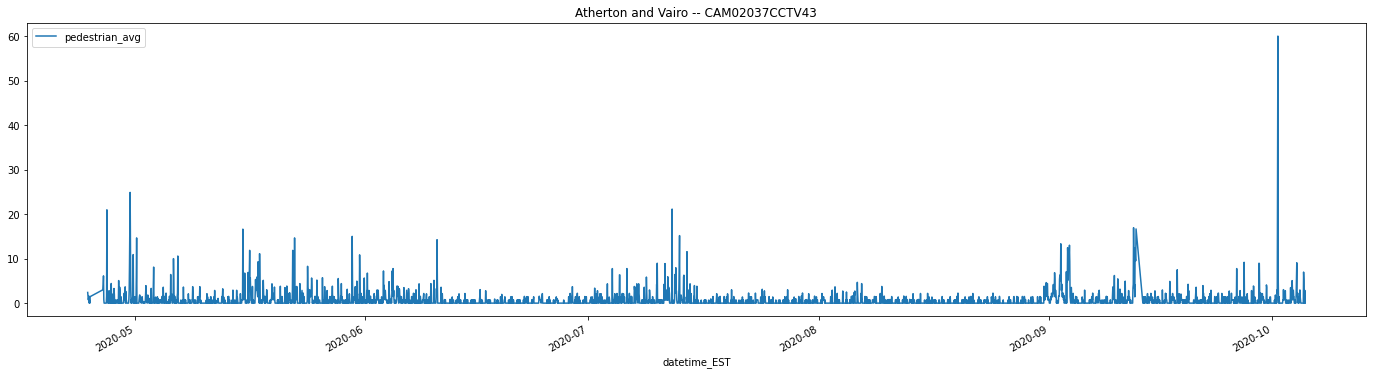

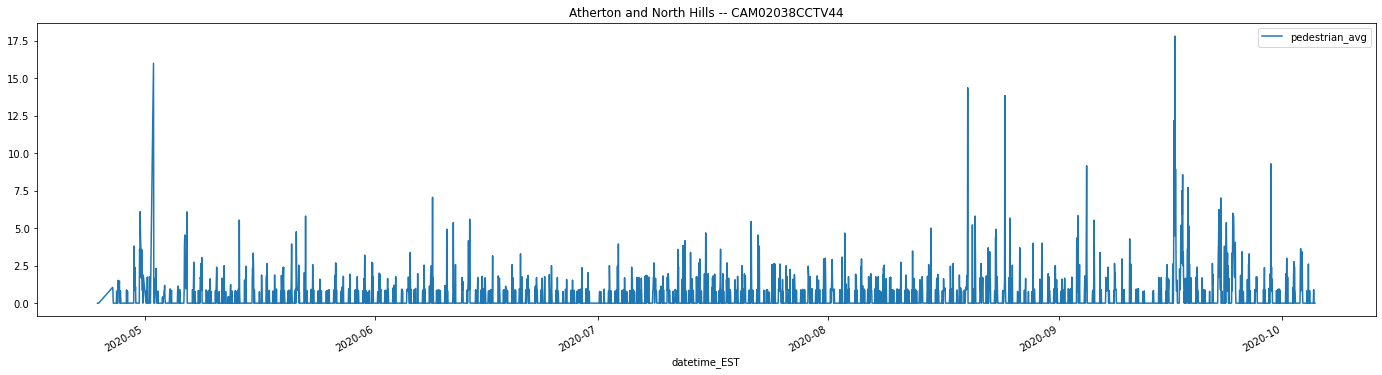

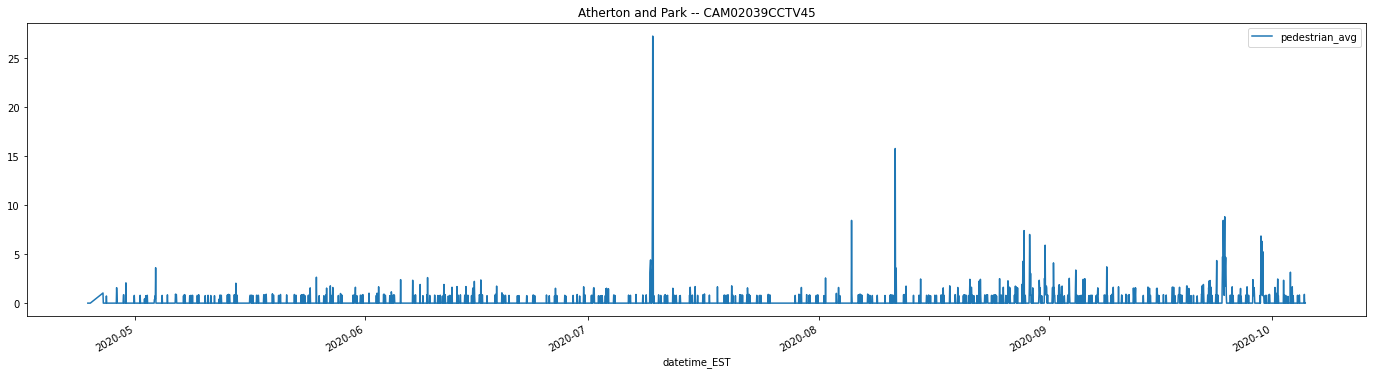

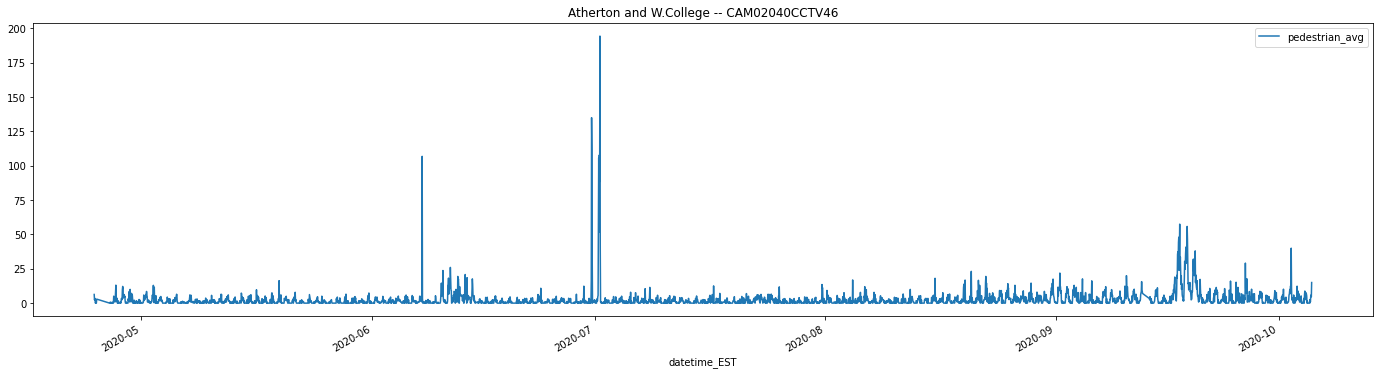

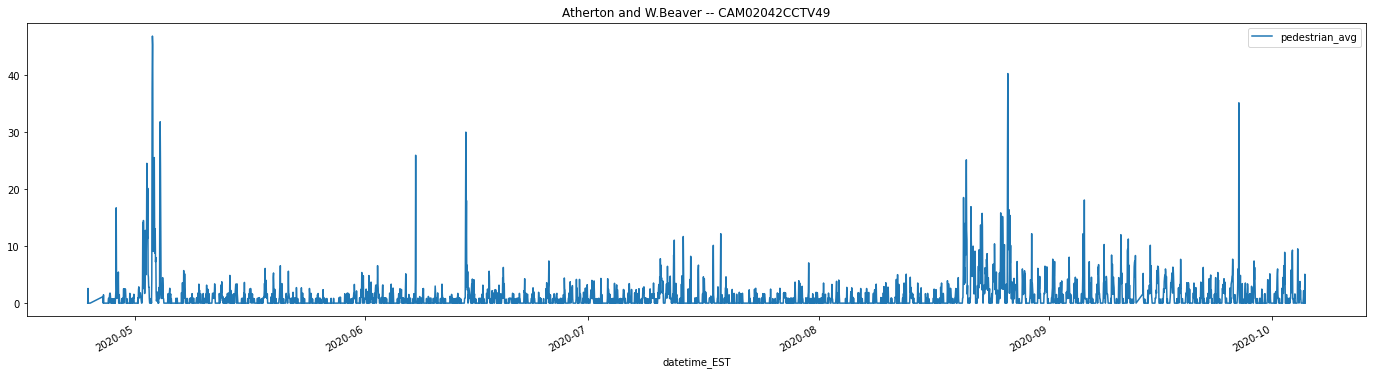

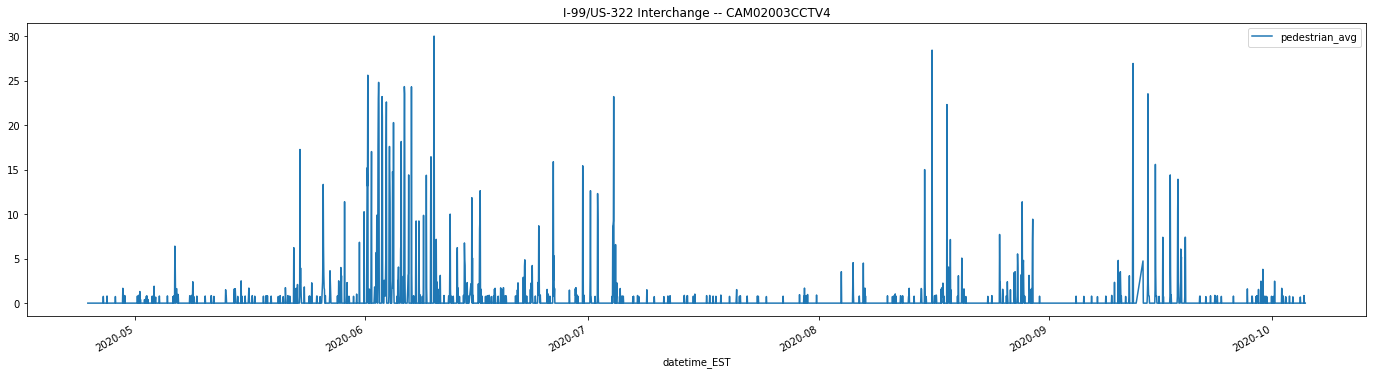

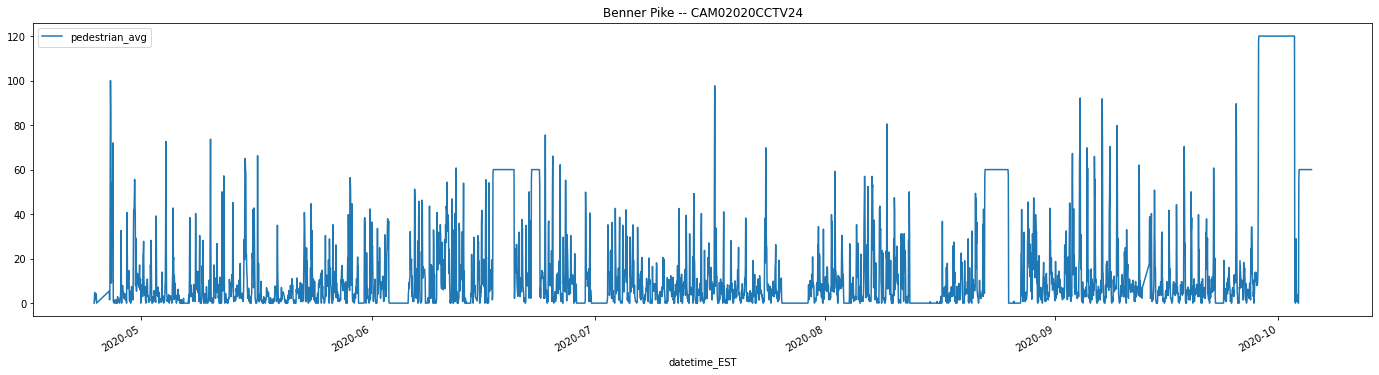

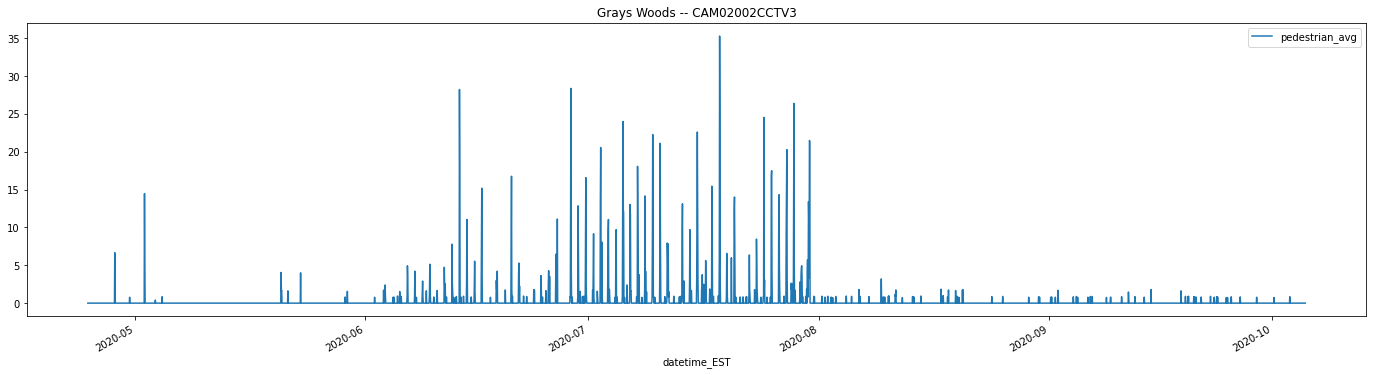

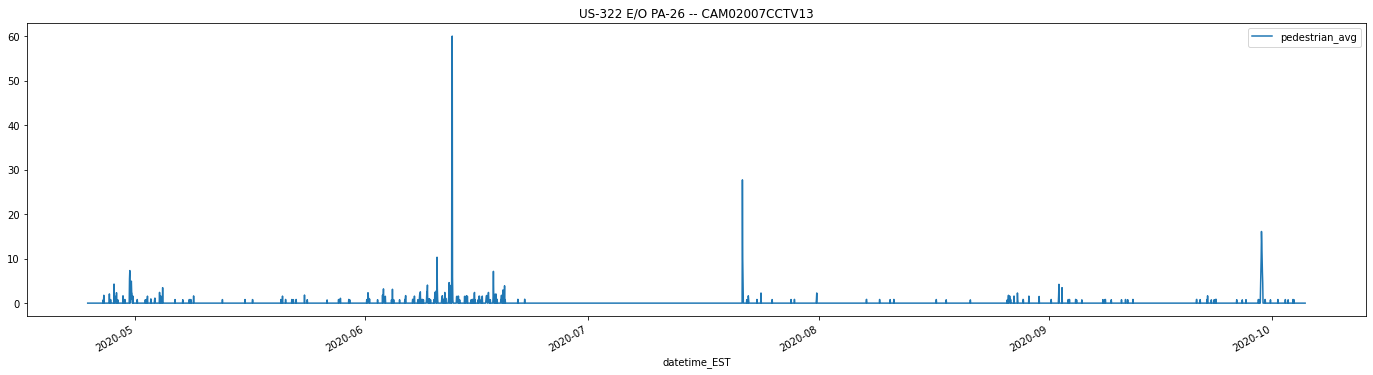

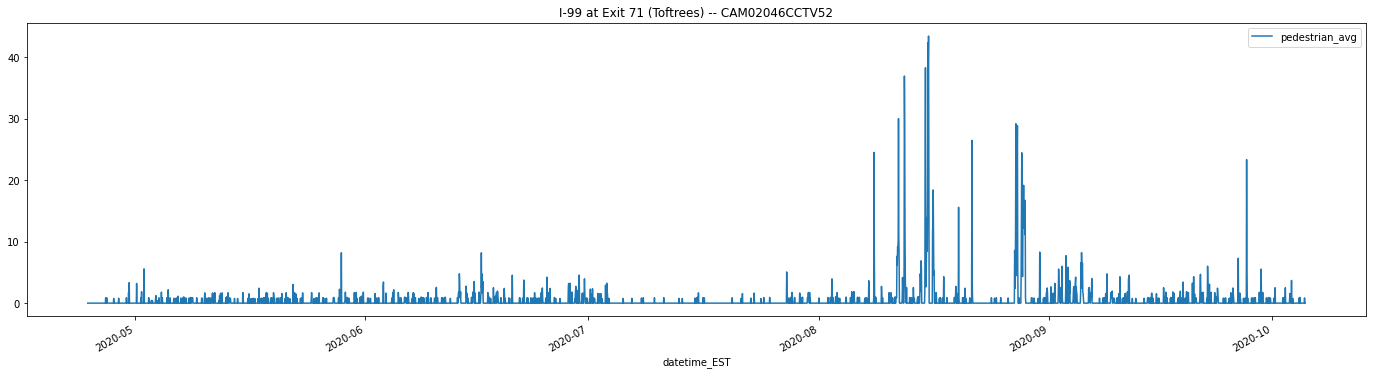

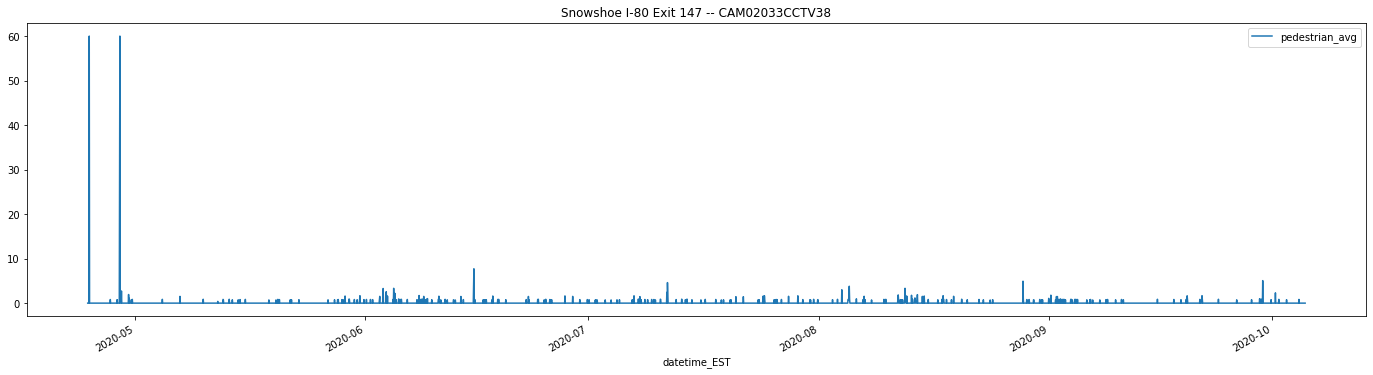

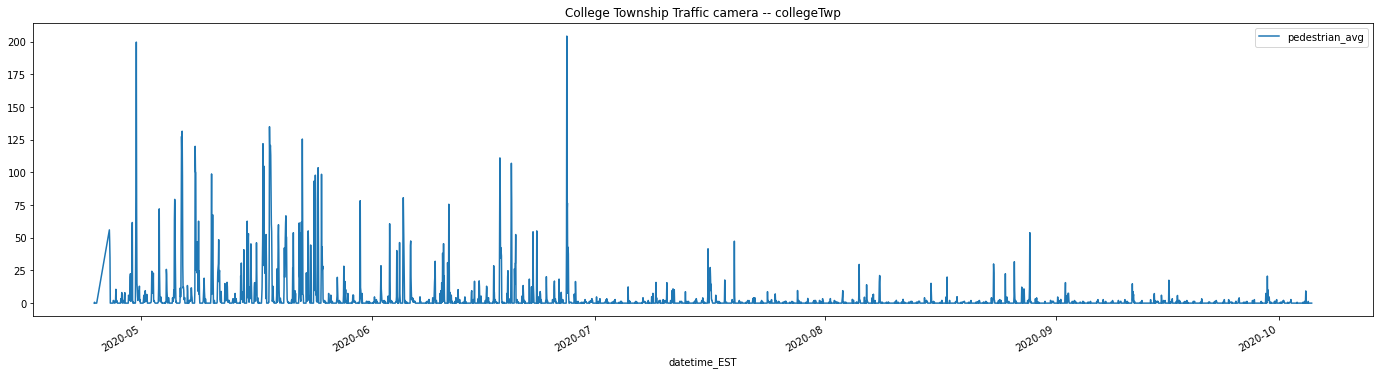

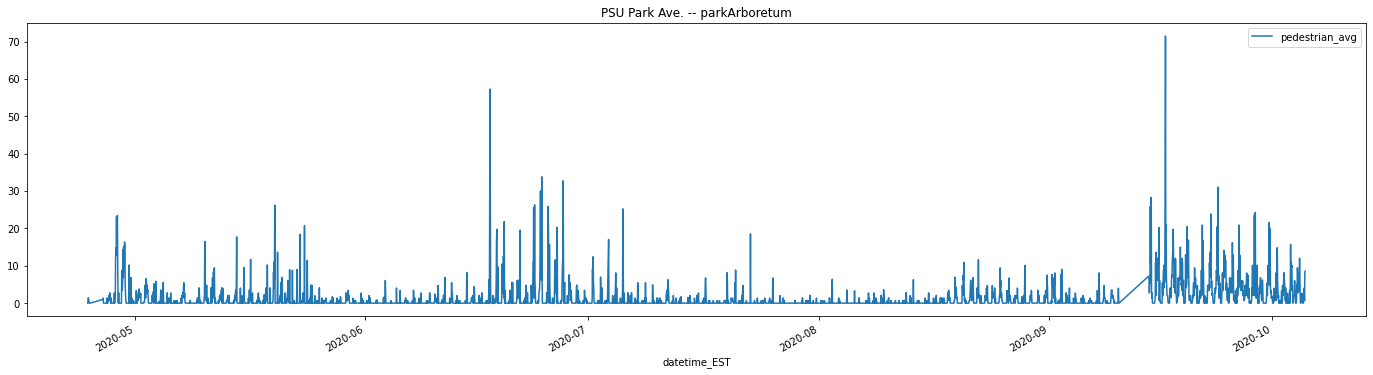

In [17]:
for c in cameras:
    cn = c[0][:-4]
    fdf_twp = icdfcvc[icdfcvc['camera_name'].str.contains(cn)].copy()
    
    fdf_twp['datetime_EST'] = pd.to_datetime(fdf_twp['datetime_EST'])
    fdf_twp.sort_values(by='datetime_EST')
    ax = fdf_twp.plot(x ='datetime_EST', y='pedestrian_avg', kind = 'line',figsize=(24,6),title=f"{c[1]} -- {cn}")

In [18]:
icdfcvc.to_csv("pedestrian_avg_per_hour_each_camera_427-105.csv",index=False)

In [193]:
xdf

,datetime_UTC,image_path,camera_name,pedestrian_count,datetime_EST
0,2020-08-10 17:19:41,'/home/ubuntu/cams20/CAM02001CCTV2/20200810/20...,CAM02001CCTV2.jpg,0,2020-08-10 13:19:41
1,2020-08-10 17:22:40,'/home/ubuntu/cams20/CAM02001CCTV2/20200810/20...,CAM02001CCTV2.jpg,0,2020-08-10 13:22:40
2,2020-08-10 17:23:21,'/home/ubuntu/cams20/CAM02001CCTV2/20200810/20...,CAM02001CCTV2.jpg,0,2020-08-10 13:23:21
3,2020-08-10 17:24:02,'/home/ubuntu/cams20/CAM02001CCTV2/20200810/20...,CAM02001CCTV2.jpg,0,2020-08-10 13:24:02
4,2020-08-10 17:24:50,'/home/ubuntu/cams20/CAM02001CCTV2/20200810/20...,CAM02001CCTV2.jpg,0,2020-08-10 13:24:50
...,...,...,...,...,...
3718960,2020-06-15 14:00:31,'/home/ubuntu/camsb9/parkArboretum/20200615/20...,parkArboretum.jpg,0,2020-06-15 10:00:31
3718961,2020-06-15 14:01:11,'/home/ubuntu/camsb9/parkArboretum/20200615/20...,parkArboretum.jpg,0,2020-06-15 10:01:11
3718962,2020-06-15 14:01:52,'/home/ubuntu/camsb9/parkArboretum/20200615/20...,parkArboretum.jpg,0,2020-06-15 10:01:52
3718963,2020-06-15 14:03:37,'/home/ubuntu/camsb9/parkArboretum/20200615/20...,parkArboretum.jpg,0,2020-06-15 10:03:37


In [221]:
xdfb.set_index('datetime_EST', drop=False, inplace=True)
df_sampledhb = xdfb.set_index('datetime_EST').resample('H').sum().reset_index()

In [228]:
icdfs

,datetime_EST,image_count_sum
0,2020-04-24 16:00:00,447
1,2020-04-24 17:00:00,1443
2,2020-04-24 18:00:00,1353
3,2020-04-24 20:00:00,1144
4,2020-04-24 21:00:00,687
...,...,...
3865,2020-10-05 07:00:00,1349
3866,2020-10-05 08:00:00,1331
3867,2020-10-05 09:00:00,1369
3868,2020-10-05 10:00:00,1301


In [225]:
df_sampledhb

,datetime_EST,pedestrian_count
0,2020-04-24 16:00:00,3
1,2020-04-24 17:00:00,13
2,2020-04-24 18:00:00,14
3,2020-04-24 19:00:00,0
4,2020-04-24 20:00:00,6
...,...,...
3927,2020-10-05 07:00:00,11
3928,2020-10-05 08:00:00,14
3929,2020-10-05 09:00:00,9
3930,2020-10-05 10:00:00,27


In [196]:
icdfs.columns

Index(['datetime_EST', 'image_count_sum'], dtype='object')

In [223]:
mergedb = df_sampledhb.merge(icdfs, on='datetime_EST')

In [150]:
merged

,datetime_EST,pedestrian_count,image_count_sum
0,2020-04-24 16:00:00,3,447
1,2020-04-24 17:00:00,13,1443
2,2020-04-24 18:00:00,14,1353
3,2020-04-24 20:00:00,6,1144
4,2020-04-24 21:00:00,4,687
...,...,...,...
3865,2020-10-05 07:00:00,100,1438
3866,2020-10-05 08:00:00,103,1420
3867,2020-10-05 09:00:00,98,1458
3868,2020-10-05 10:00:00,116,1390


In [224]:
mergedb

,datetime_EST,pedestrian_count,image_count_sum
0,2020-04-24 16:00:00,3,447
1,2020-04-24 17:00:00,13,1443
2,2020-04-24 18:00:00,14,1353
3,2020-04-24 20:00:00,6,1144
4,2020-04-24 21:00:00,4,687
...,...,...,...
3865,2020-10-05 07:00:00,11,1349
3866,2020-10-05 08:00:00,14,1331
3867,2020-10-05 09:00:00,9,1369
3868,2020-10-05 10:00:00,27,1301


In [229]:
def get_vc_avg(row):
    rv = 0.0
    if row.image_count_sum > 0:
        rv = (float(row.pedestrian_count) / (float(row.image_count_sum)/(18.0 * 60.0)))  # 18 cameras w/o Benner Pike
    return rv   

df_sampledhb['pedestrian_avg'] = mergedb.apply(get_vc_avg, axis=1)
mergedb['pedestrian_avg'] = mergedb.apply(get_vc_avg, axis=1)

In [230]:
mergedb

,datetime_EST,pedestrian_count,image_count_sum,pedestrian_avg
0,2020-04-24 16:00:00,3,447,7.248322
1,2020-04-24 17:00:00,13,1443,9.729730
2,2020-04-24 18:00:00,14,1353,11.175166
3,2020-04-24 20:00:00,6,1144,5.664336
4,2020-04-24 21:00:00,4,687,6.288210
...,...,...,...,...
3865,2020-10-05 07:00:00,11,1349,8.806523
3866,2020-10-05 08:00:00,14,1331,11.359880
3867,2020-10-05 09:00:00,9,1369,7.100073
3868,2020-10-05 10:00:00,27,1301,22.413528


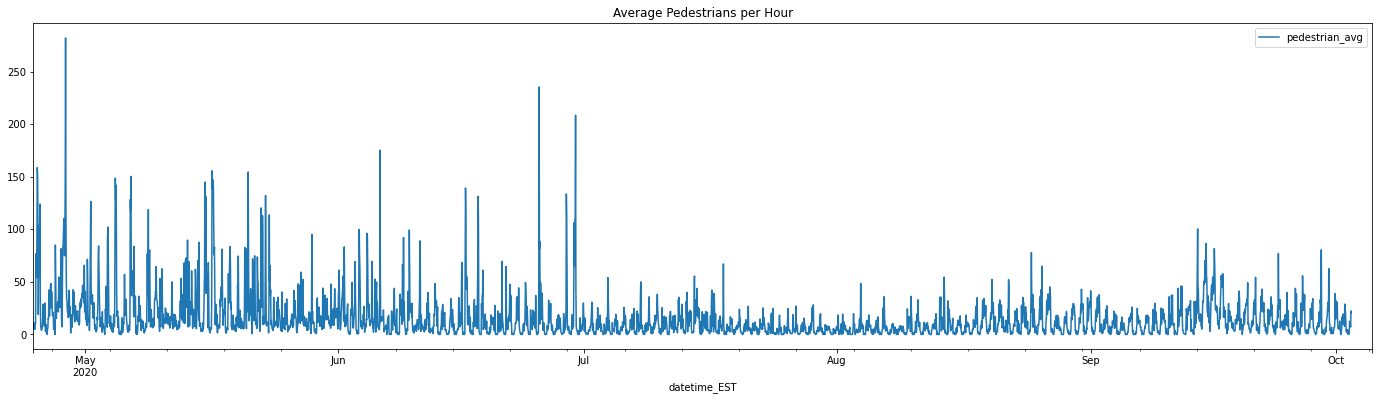

In [231]:
fromjul = mergedb[mergedb['datetime_EST'] > '2020-7-1 00:00:00']
ax = df_sampledh.plot(x ='datetime_EST', y='pedestrian_avg', kind = 'line',figsize=(24,6),title=f"Average Pedestrians per Hour")

In [234]:
mergedb.to_csv("pedestrian_avg_per_hour_all_cameras_427-105.csv",index=False)

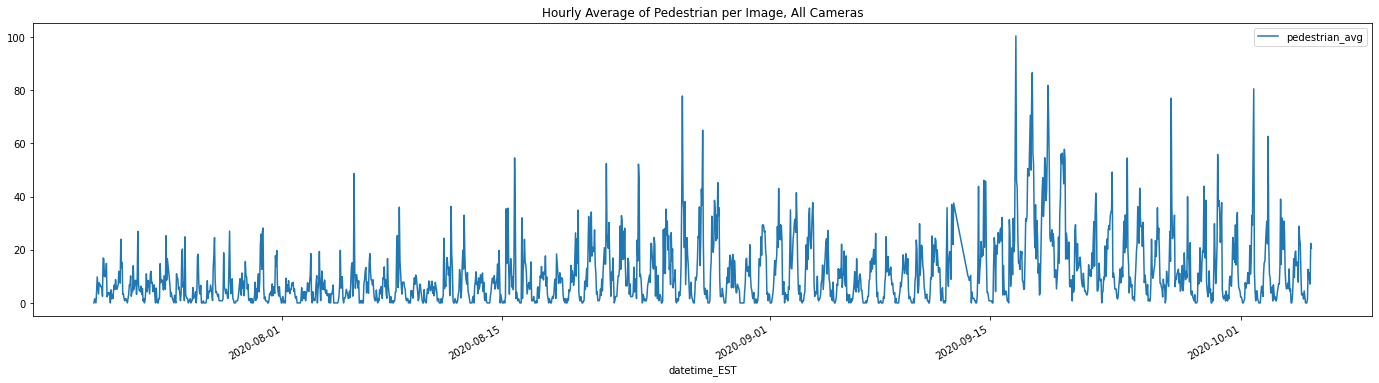

In [235]:
sds = mergedb[(mergedb['datetime_EST'] > '2020-07-20 00:00:00')]
ax = sds.plot(x ='datetime_EST', y='pedestrian_avg', kind = 'line',figsize=(24,6),title="Hourly Average of Pedestrian per Image, All Cameras")


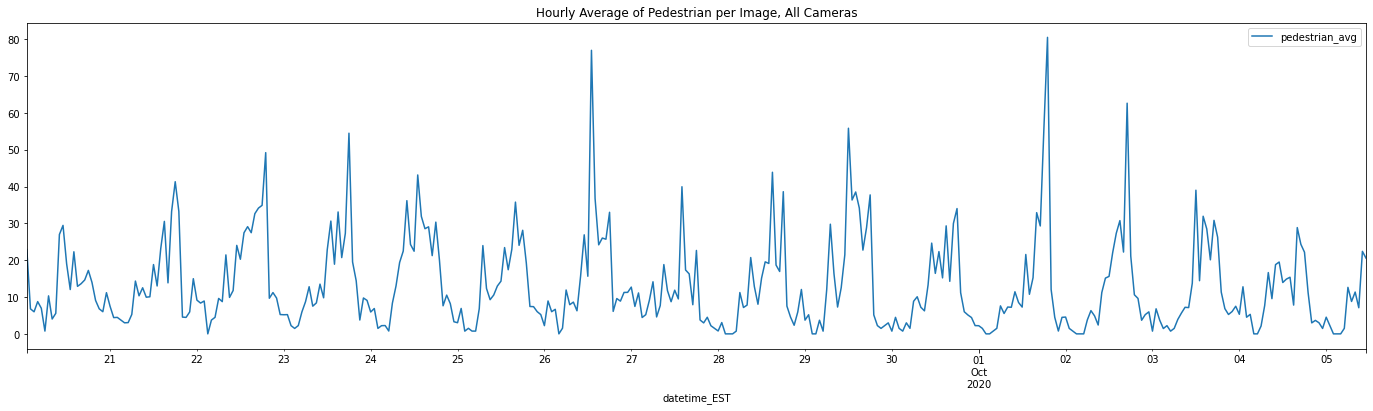

In [233]:
sds = mergedb[(mergedb['datetime_EST'] > '2020-9-20 00:00:00')]
ax = sds.plot(x ='datetime_EST', y='pedestrian_avg', kind = 'line',figsize=(24,6),title="Hourly Average of Pedestrian per Image, All Cameras")
